In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
all_cleaned = pd.read_csv('data/all_cleaned.csv')

In [3]:
all_cleaned.head(10)

,Unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher,country,continent
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0,18.0,Teenager,mark p o morford,classical mythology,oxford university press,usa,North America
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,canada,North America
2,2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0,49.0,Adult,richard bruce wright,clara callan,harperflamingo canada,canada,North America
3,3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,NaN,Unknown
4,4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,canada,North America
5,5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,8.0,"toronto, ontario, canada",30.0,30.0,Adult,richard bruce wright,clara callan,harperflamingo canada,canada,North America
6,6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526.0,0.0,"victoria, british columbia, canada",36.0,36.0,Adult,richard bruce wright,clara callan,harperflamingo canada,canada,North America
7,7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,96054.0,0.0,"ottawa, ontario, canada",29.0,29.0,Adult,richard bruce wright,clara callan,harperflamingo canada,canada,North America
8,8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866.0,9.0,"ottawa, ,",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,NaN,Unknown
9,9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629.0,9.0,"kingston, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,canada,North America


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import KNNBasic
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

### KNN GitHub

In [5]:
# # Define the reader object for Surprise
# reader = all_cleaned(book_rating=(1, 5))

# # Load the merged dataframe into Surprise's Dataset object
# data = all_cleaned[all_cleaned['user_id', 'book_id', 'rating']], reader

# # Split the data into a train set and a test set
# trainset, testset = train_test_split(data, test_size=0.2)

# # Create the KNNBasic model
# algo = KNeighborsClassifier()

# # Train the model
# algo.fit(trainset)

# # Make predictions on the test set
# predictions = algo.test(testset)

# # Calculate evaluation metrics
# rmse = accuracy.rmse(predictions)
# mae = accuracy.mae(predictions)

# print(f"RMSE: {rmse}")
# print(f"MAE: {mae}")

### KNN: user_id similar to a book_title

In [6]:
from sklearn.neighbors import NearestNeighbors


In [7]:
# Subset of the data (let's take 500 books and their readers for testing)
subset_books = all_cleaned['mod_book_title'].unique()[:500]  # Select first 500 unique books
subset_data = all_cleaned[all_cleaned['mod_book_title'].isin(subset_books)]

# Check the subset size
print("Subset Size:", subset_data.shape)

Subset Size: (42435, 17)


In [8]:
# Step 2: Create a book-user matrix from the subset of data
subset_book_user_matrix = subset_data.pivot_table(index='mod_book_title', columns='user_id', values='book_rating').fillna(0)

# Convert to sparse matrix for memory efficiency
subset_book_user_sparse_matrix = csr_matrix(subset_book_user_matrix)

# Check the matrix size
print("Subset Book-User Matrix Shape:", subset_book_user_matrix.shape)

Subset Book-User Matrix Shape: (500, 16858)


In [9]:

# Initialize KNN model for cosine similarity
knn_subset = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)

# Fit the model on the sparse book-user matrix for the subset
knn_subset.fit(subset_book_user_sparse_matrix)

# Example: Find similar readers based on a specific book title in the subset
test_book_title = 'wild animus'  # Example book title from the subset

# Ensure the test book title exists in the subset
if test_book_title in subset_book_user_matrix.index:
    # Get the index of the book title in the matrix
    test_book_index = subset_book_user_matrix.index.get_loc(test_book_title)

    # Find 10 similar readers (users) based on the book's ratings
    distances, indices = knn_subset.kneighbors(subset_book_user_matrix.iloc[test_book_index, :].values.reshape(1, -1), n_neighbors=10)

    # Display the similar readers
    similar_readers_subset = subset_book_user_matrix.columns[indices.flatten()]
    print(f"Readers similar to those who rated the book '{test_book_title}':")
    for i, reader in enumerate(similar_readers_subset):
        print(f"Reader {reader} with similarity distance {distances.flatten()[i]:.4f}")
else:
    print(f"Book title '{test_book_title}' not found in the subset.")


Readers similar to those who rated the book 'wild animus':
Reader 7194.0 with similarity distance 0.0000
Reader 2528.0 with similarity distance 0.9319
Reader 4066.0 with similarity distance 0.9351
Reader 81.0 with similarity distance 0.9459
Reader 44.0 with similarity distance 0.9637
Reader 915.0 with similarity distance 0.9642
Reader 5126.0 with similarity distance 0.9671
Reader 4514.0 with similarity distance 0.9681
Reader 217.0 with similarity distance 0.9684
Reader 327.0 with similarity distance 0.9700


### KNN: closest book to a book 

In [10]:
# Subset of the data (let's take 500 books for testing)
subset_books = all_cleaned['mod_book_title'].unique()[:500]  # Select first 500 unique books
subset_data = all_cleaned[all_cleaned['mod_book_title'].isin(subset_books)]

# Check the subset size
print("Subset Size:", subset_data.shape)

Subset Size: (42435, 17)


In [11]:
# Step 2: Create a book-user matrix for the subset
subset_book_user_matrix = subset_data.pivot_table(index='mod_book_title', columns='user_id', values='book_rating').fillna(0)

# Convert the matrix to a sparse matrix for memory efficiency
from scipy.sparse import csr_matrix
subset_book_user_sparse_matrix = csr_matrix(subset_book_user_matrix)

# Check the shape of the matrix
print("Subset Book-User Matrix Shape:", subset_book_user_matrix.shape)

Subset Book-User Matrix Shape: (500, 16858)


In [12]:
# Initialize KNN model for cosine similarity
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)

# Fit the model on the sparse matrix
knn_model.fit(subset_book_user_sparse_matrix)

# Step 4: Select a Book and Find Similar Books
# Example: Find similar books to 'wild animus' (or any other book in the subset)
selected_book_title = 'clara callan'  # Change this to test other books

# Ensure the selected book exists in the matrix
if selected_book_title in subset_book_user_matrix.index:
    # Get the index of the selected book in the matrix
    book_index = subset_book_user_matrix.index.get_loc(selected_book_title)

    # Find 10 similar books
    distances, indices = knn_model.kneighbors(subset_book_user_matrix.iloc[book_index, :].values.reshape(1, -1), n_neighbors=10)

    # Retrieve the similar book titles
    similar_books = subset_book_user_matrix.index[indices.flatten()]

    # Display the results
    print(f"Books similar to '{selected_book_title}':")
    for i, book in enumerate(similar_books):
        print(f"{i+1}. {book} (Similarity Distance: {distances.flatten()[i]:.4f})")
else:
    print(f"Book '{selected_book_title}' not found in the subset.")

Books similar to 'clara callan':
1. clara callan (Similarity Distance: 0.0000)
2. the witchfinder amos walker mystery series (Similarity Distance: 0.7858)
3. the middle stories (Similarity Distance: 0.7858)
4. more cunning than man a social history of rats and man (Similarity Distance: 0.7858)
5. i spy a book of picture riddles (Similarity Distance: 0.7891)
6. die cappuccino jahre aus dem tagebuch des adrian mole (Similarity Distance: 0.8063)
7. the snow garden (Similarity Distance: 0.8084)
8. killer market deborah knott mysteries paperback (Similarity Distance: 0.8176)
9. goodbye to the buttermilk sky (Similarity Distance: 0.8486)
10. prague a novel (Similarity Distance: 0.8490)


### KNN: closest author to an author 

In [13]:
#same steps as before 
subset_authors = all_cleaned['mod_book_author'].unique()[:500] 
subset_data_authors = all_cleaned[all_cleaned['mod_book_author'].isin(subset_authors)]

print("Subset Size:", subset_data_authors.shape)

Subset Size: (239188, 17)


In [14]:
subset_authors_user_matrix = subset_data_authors.pivot_table(index='mod_book_author', columns='user_id', values='book_rating').fillna(0)

subset_authors_user_sparse_matrix = csr_matrix(subset_authors_user_matrix)

print("Subset Book-User Matrix Shape:", subset_authors_user_matrix.shape)

Subset Book-User Matrix Shape: (500, 42272)


In [15]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)

# Fit the model on the sparse matrix
knn_model.fit(subset_authors_user_sparse_matrix)

# Step 4: Select a Book and Find Similar Books
# Example: Find similar books to 'wild animus' (or any other book in the subset)
selected_author_title = 'john grisham'  # Change this to test other books

# Ensure the selected book exists in the matrix
if selected_author_title in subset_authors_user_matrix.index:
    # Get the index of the selected book in the matrix
    author_index = subset_authors_user_matrix.index.get_loc(selected_author_title)

    # Find 10 similar books
    distances, indices = knn_model.kneighbors(subset_authors_user_matrix.iloc[author_index, :].values.reshape(1, -1), n_neighbors=10)

    # Retrieve the similar book titles
    similar_author = subset_authors_user_matrix.index[indices.flatten()]

    # Display the results
    print(f"Authors similar to '{selected_author_title}':")
    for i, book in enumerate(similar_author):
        print(f"{i+1}. {book} (Similarity Distance: {distances.flatten()[i]:.4f})")
else:
    print(f"Book '{selected_author_title}' not found in the subset.")

Authors similar to 'john grisham':
1. john grisham (Similarity Distance: 0.0000)
2. james patterson (Similarity Distance: 0.8696)
3. michael crichton (Similarity Distance: 0.8853)
4. mary higgins clark (Similarity Distance: 0.8893)
5. dean r koontz (Similarity Distance: 0.8938)
6. stephen king (Similarity Distance: 0.8940)
7. tom clancy (Similarity Distance: 0.8946)
8. john sandford (Similarity Distance: 0.9018)
9. patricia daniels cornwell (Similarity Distance: 0.9024)
10. david baldacci (Similarity Distance: 0.9025)


### Clustering ? Unsupervised learning

In [16]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [17]:
# Create the book-user matrix (same as in KNN step)
subset_book_user_matrix = subset_data.pivot_table(index='mod_book_title', columns='user_id', values='book_rating').fillna(0)

# Convert to sparse matrix (optional, for memory efficiency)
from scipy.sparse import csr_matrix
subset_book_user_sparse_matrix = csr_matrix(subset_book_user_matrix)


In [18]:
# Step 2: Apply KMeans clustering to the book-user matrix
num_clusters = 6  # You can change the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model on the sparse book-user matrix
kmeans.fit(subset_book_user_matrix)

# Step 3: Assign cluster labels to each book
subset_book_user_matrix['cluster'] = kmeans.labels_

# Display the first few rows of books with their assigned cluster
print(subset_book_user_matrix[['cluster']].head())

user_id               cluster
mod_book_title               
a judgement in stone        0
a kiss remembered           0
a man in full               0
a monk swimming             0
a painted house             4


In [19]:
# Step 4: Display the books in each cluster
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(subset_book_user_matrix[subset_book_user_matrix['cluster'] == cluster].index.tolist())


Cluster 0:
['a judgement in stone', 'a kiss remembered', 'a man in full', 'a monk swimming', 'a second chicken soup for the womans soul chicken soup for the soul series', 'a small dark place', 'a soldier of the great war', 'a widow for one year', 'a year by the sea thoughts of an unfinished woman', 'affinity', 'airframe', 'alices adventures in wonderland and through the looking glass', 'alices tulips', 'all he ever wanted a novel', 'all or nothing wheeler large print books', 'all our yesterdays large print', 'all that remains', 'all that remains kay scarpetta mysteries paperback', 'all the kings men', 'alpha teach yourself american sign language in 24 hours alpha teach yourself in 24 hours', 'always daddys girl understanding your fathers impact on who you are', 'amorrada al pil columna', 'an accidental woman', 'an atmosphere of eternity stories of india', 'angel of hope mercy trilogy', 'angels amp insects two novellas', 'angels and visitations a miscellany', 'anils ghost', 'animal far

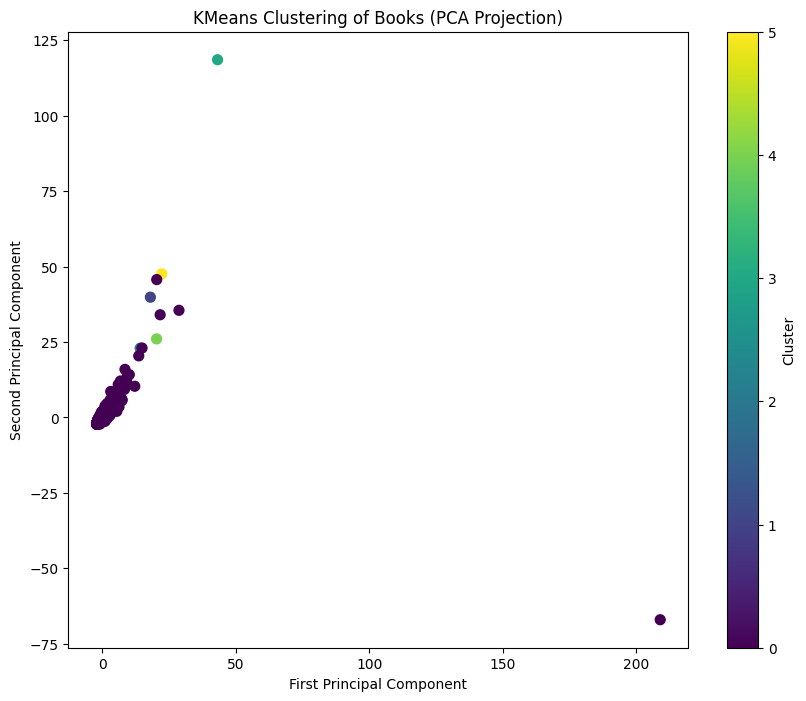

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 5: Reduce the dimensionality of the data for visualization (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(subset_book_user_matrix.drop('cluster', axis=1))

# Step 6: Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=subset_book_user_matrix['cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering of Books (PCA Projection)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()

In [21]:
!pip install pca

In [22]:
from sklearn.decomposition import PCA 

In [23]:
all_cleaned.head()

,Unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher,country,continent
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0,18.0,Teenager,mark p o morford,classical mythology,oxford university press,usa,North America
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,canada,North America
2,2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0,49.0,Adult,richard bruce wright,clara callan,harperflamingo canada,canada,North America
3,3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,NaN,Unknown
4,4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,canada,North America


In [24]:
from sklearn.preprocessing import LabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.preprocessing import StandardScaler

In [25]:
# # Ensure 'year_of_publication' is a string type
# all_cleaned['year_of_publication'] = all_cleaned['year_of_publication'].astype(str)

# # Filter out rows where 'year_of_publication' is not numeric
# df = all_cleaned[all_cleaned['year_of_publication'].str.isnumeric()]

# # Convert 'year_of_publication' to integer
# df['year_of_publication'] = df['year_of_publication'].apply(lambda x: int(x))

# # Filter to keep only publications before or in 2021
# df = df[df['year_of_publication'] <= 2021]

In [26]:
# # Ensure 'age' and 'book_rating' are numeric
# df['age'] = pd.to_numeric(df['age'], errors='coerce')
# df['book_rating'] = pd.to_numeric(df['book_rating'], errors='coerce')

# # Drop rows with missing values (NaNs) in 'age' or 'book_rating'
# df = df.dropna(subset=['age', 'book_rating'])

# # Group by book title and calculate the mean age
# mean_age_by_book = df.groupby("mod_book_title")["age"].mean().rename("mean_age_by_book")
# df = pd.merge(df, mean_age_by_book, on="mod_book_title", how="inner")

# # Group by author and calculate the mean age
# mean_age_by_author = df.groupby("mod_book_author")["age"].mean().rename("mean_age_by_author")
# df = pd.merge(df, mean_age_by_author, on="mod_book_author", how="inner")

# # Group by publisher and calculate the mean age
# mean_age_by_publisher = df.groupby("mod_publisher")["age"].mean().rename("mean_age_by_publisher")
# df = pd.merge(df, mean_age_by_publisher, on="mod_publisher", how="inner")

# # Group by book title and calculate the mean rating
# mean_rating_by_book = df.groupby("mod_book_title")["book_rating"].mean().rename("mean_rating_by_book")
# df = pd.merge(df, mean_rating_by_book, on="mod_book_title", how="inner")

# # Group by author and calculate the mean rating
# mean_rating_by_author = df.groupby("mod_book_author")["book_rating"].mean().rename("mean_rating_by_author")
# df = pd.merge(df, mean_rating_by_author, on="mod_book_author", how="inner")

# # Group by publisher and calculate the mean rating
# mean_rating_by_publisher = df.groupby("mod_publisher")["book_rating"].mean().rename("mean_rating_by_publisher")
# df = pd.merge(df, mean_rating_by_publisher, on="mod_publisher", how="inner")

# # Drop columns that are no longer needed
# df = df.drop(["age", "book_rating", "user_id"], axis=1)


In [27]:
# ## Dropping Strange Ages
# # Some years are greater than 100 (some are even greater than 200, 
# # which is worse). So, we will limit the user age to be less than 100.

# # df = all_cleaned[all_cleaned["age"] < 100]

# ## Dropping Strange Years Of Publication and Converting to Int
# # Some years of publication are not numerical. Besides, 
# # some of them are greater than 2004, which is really strange, 
# # since the data was collected in 2004.

# df = all_cleaned[all_cleaned["year_of_publication"].str.isnumeric()]
# df["year_of_publication"] = df["year_of_publication"].apply(lambda x: int(x))
# df = df[df["year_of_publication"] <= 2021]

# ## Mean Ages and Ratings
# # Now, we will start getting our features.

# mean_age_by_book = df.groupby("mod_book_title")["age"].mean().rename("mean_age_by_book")
# df = pd.merge(df, mean_age_by_book, on="mod_book_title", how="inner")
# mean_age_by_author = df.groupby("mod_book_author")["age"].mean().rename("mean_age_by_author")
# df = pd.merge(df, mean_age_by_author, on="mod_book_author", how="inner")
# mean_age_by_publisher = df.groupby("mod_publisher")["age"].mean().rename("mean_age_by_publisher")
# df = pd.merge(df, mean_age_by_publisher, on="mod_publisher", how="inner")
# mean_rating_by_book = df.groupby("mod_book_title")["book_rating"].mean().rename("mean_rating_by_book")
# df = pd.merge(df, mean_rating_by_book, on="book_rating", how="inner")
# mean_rating_by_author = df.groupby("mod_book_author")["book_rating"].mean().rename("mean_rating_by_author")
# df = pd.merge(df, mean_rating_by_author, on="mod_book_author", how="inner")
# mean_rating_by_publisher = df.groupby("mod_publisher")["book_rating"].mean().rename("mean_rating_by_publisher")
# df = pd.merge(df, mean_rating_by_publisher, on="mod_publisher", how="inner")
# df = df.drop(["age", "book_rating", "user_id"], axis=1)

# # Top Location By Book

# location_count_by_book = df.groupby(["isbn", "country"]).size().reset_index(name="readers_count_in_top_country")
# top_location_by_book = location_count_by_book.loc[location_count_by_book.groupby("isbn")["readers_count_in_top_country"].idxmax()].rename({"country": "Top_Location_By_Book"}, axis=1)
# df = pd.merge(df, top_location_by_book, on="isbn", how="inner")

# # Count Encodings

# location_encoder = CountFrequencyEncoder()
# df["location_encoded"] = location_encoder.fit_transform(df["country"])
# location_encodings = df.groupby(["country"])["location_encoded"].max().rename("top_location_by_book_encoded")
# df = df.drop(["location_encoded"], axis=1)
# df = pd.merge(df, location_encodings, left_on="top_location_by_book", right_on="country", how="inner")
# df = df.drop(["country", "top_location_by_book"], axis=1)
# author_encoder = CountEncoder()
# df["book_author_encoded"] = author_encoder.fit_transform(df["book_author"])
# df = df.drop(["book_author"], axis=1)
# publisher_encoder = CountEncoder()
# df["publisher_encoded"] = publisher_encoder.fit_transform(df["mod_publisher"])
# df = df.drop(["mod_publisher"], axis=1)

# # Book Contribution to Top Location

# df["book_contribution_to_top_location"] = df["readers_count_in_top_location"]/df["top_location_by_book_encoded"]
# df = df.drop(["readers_count_in_top_location"], axis=1)

# # Book Appearances

# isbn_encoder = CountFrequencyEncoder()
# df["book_appearances"] = isbn_encoder.fit_transform(df["isbn"])

# # Dropping duplicates

# df = df.drop_duplicates()

# # Scaling Data
# ## In the future, we will use PCA (Principal Component Analysis). 
# ## It's necessary to center the data in the origin 
# ## (although the Sklearn's PCA do it already) to make the
# ## PCA algorithm work right. So, we will make a StandardScale.

# X = df.drop(["isbn", 'mod_book_title'], axis=1)
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### MDS

Original Dimension of X :  (100, 3)
Dimension of X after MDS :  (100, 2)


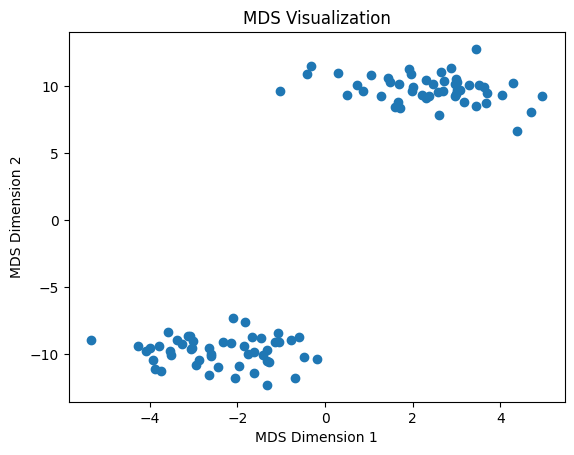

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import MDS

# Generate a sample dataset (you can replace this with your own data)
X, _ = make_blobs(n_samples=100, n_features=3, centers=2, random_state=42)

print('Original Dimension of X : ', X.shape)
# Perform MDS to reduce the dimensionality to 2D

mds = MDS(n_components=2, random_state=42)
X_2d = mds.fit_transform(X)

print('Dimension of X after MDS : ', X_2d.shape)

# Plot the results
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title("MDS Visualization")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()


In [31]:
df_subset = all_cleaned.sample(n=1000)  # Take a random sample of 1000 rows
scaled_subset = scaler.fit_transform(df_subset)
mds_transformed_subset = mds.fit_transform(scaled_subset)

ValueError: could not convert string to float: '030706039X'

In [29]:
# numeric_df = all_cleaned.select_dtypes(include=['float64', 'int64'])
# # Drop rows with any NaN values
# df_cleaned = numeric_df.dropna()

# # Scale the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_cleaned)

# # Apply MDS
# mds = MDS(n_components=2, random_state=42)  # 2D MDS
# mds_transformed = mds.fit_transform(scaled_data)

# # Convert MDS output into a DataFrame for easier plotting and interpretation
# mds_df = pd.DataFrame(mds_transformed, columns=['MDS1', 'MDS2'])

# # Plot the results
# plt.figure(figsize=(10, 8))
# plt.scatter(mds_df['MDS1'], mds_df['MDS2'], c='blue', edgecolor='k', s=50)
# plt.title('MDS Plot')
# plt.xlabel('MDS1')
# plt.ylabel('MDS2')
# plt.grid(True)
# plt.show()

In [30]:
# # Assuming `df` is your dataset and you want to apply MDS on it.
# # Drop non-numeric columns if necessary and scale the data.
# numeric_df = all_cleaned.select_dtypes(include=['float64', 'int64'])

# # Scale the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(numeric_df)

# # Apply MDS
# mds = MDS(n_components=2, random_state=42)  # 2D MDS
# mds_transformed = mds.fit_transform(scaled_data)

# # Convert MDS output into a DataFrame for easier plotting and interpretation
# mds_df = pd.DataFrame(mds_transformed, columns=['MDS1', 'MDS2'])

# # Plot the results
# plt.figure(figsize=(10, 8))
# plt.scatter(mds_df['MDS1'], mds_df['MDS2'], c='blue', edgecolor='k', s=50)
# plt.title('MDS Plot')
# plt.xlabel('MDS1')
# plt.ylabel('MDS2')
# plt.grid(True)
# plt.show()

ValueError: Input X contains NaN.
MDS does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Two Towers test

In [1]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Embedding, Dot, Reshape, Dense, Flatten
# from tensorflow.keras.models import Model

# # Step 1: Create a subset of the dataset
# # Here we will create a subset of the data with users, book titles, and ratings.
# subset_data = all_cleaned[['user_id', 'mod_book_title', 'book_rating']].dropna()

# # Since we are working with a large dataset, let's take a random subset of 10,000 rows for efficiency
# subset_data = subset_data.sample(n=10000, random_state=42)

# # Step 2: Preprocess data by encoding users and books into unique numerical IDs
# # Create unique integer indices for users and books
# user_ids = subset_data['user_id'].astype('category').cat.codes.values
# book_ids = subset_data['mod_book_title'].astype('category').cat.codes.values

# # Store the number of unique users and books
# num_users = len(np.unique(user_ids))
# num_books = len(np.unique(book_ids))

# # Ratings will serve as the labels
# ratings = subset_data['book_rating'].values

# # Step 3: Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(np.array([user_ids, book_ids]).T, ratings, test_size=0.2, random_state=42)

# # Step 4: Build the Two-Tower Neural Network
# # First, we define two separate embedding layers, one for users and one for books

# # User tower - learns an embedding for each user
# user_input = Input(shape=(1,))
# user_embedding = Embedding(input_dim=num_users, output_dim=50, input_length=1)(user_input)
# user_embedding = Flatten()(user_embedding)  # Flatten to make it compatible with the model

# # Book tower - learns an embedding for each book
# book_input = Input(shape=(1,))
# book_embedding = Embedding(input_dim=num_books, output_dim=50, input_length=1)(book_input)
# book_embedding = Flatten()(book_embedding)  # Flatten the embedding output

# # Step 5: Compute the dot product between the user and book embeddings
# # This gives a similarity score between the user and book
# dot_product = Dot(axes=1)([user_embedding, book_embedding])

# # Step 6: Create the output layer for the rating prediction
# # Since we're predicting book ratings, use a Dense layer with a single output
# output = Dense(1, activation='linear')(dot_product)

# # Step 7: Build the model
# model = Model(inputs=[user_input, book_input], outputs=output)

# # Step 8: Compile the model
# # We use Mean Squared Error (MSE) as the loss function since we are predicting ratings
# model.compile(optimizer='adam', loss='mse')

# # Step 9: Train the model
# # The model learns the relationship between users and books based on historical ratings
# model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=5, batch_size=64, validation_split=0.1)

# # Step 10: Evaluate the model
# # Evaluate how well the model performs on unseen test data
# test_loss = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
# print(f'Test Loss (MSE): {test_loss}')

# # Step 11: Make recommendations for a specific user
# # Let's assume we want to recommend books to user_id=5
# user_id = 5
# book_embeddings = model.layers[2].get_weights()[0]  # Get book embeddings
# user_embedding = model.layers[1].get_weights()[0][user_id]  # Get embedding for user 5

# # Compute dot product between the user embedding and all book embeddings
# recommendation_scores = np.dot(book_embeddings, user_embedding)

# # Get the indices of the top 10 recommended books
# recommended_book_indices = recommendation_scores.argsort()[-10:][::-1]

# # Get the book titles for the recommended books
# recommended_books = subset_data['mod_book_title'].astype('category').cat.categories[recommended_book_indices]
# print(f"Top 10 book recommendations for user {user_id}:")
# print(recommended_books)
